In [2]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-1.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bernoulli, poisson, binom

from collections import defaultdict
import json

import numpy as np
import scipy as sp
import copy
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

from matplotlib.colors import ListedColormap
dark2_cmap=ListedColormap(dark2_colors)

In [3]:
# The mean of random variables drawn from such distribution is $E[X] = p$ and the variance is $Var[X]=p(1-p)$
a=bernoulli.rvs(0.6, size=100)   # rvs returns a random number drawn from this distribution 

In [4]:
print(a)

[1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0]


In [5]:
print(np.sum(a))

64


In [6]:
sum(a) # basic math

64

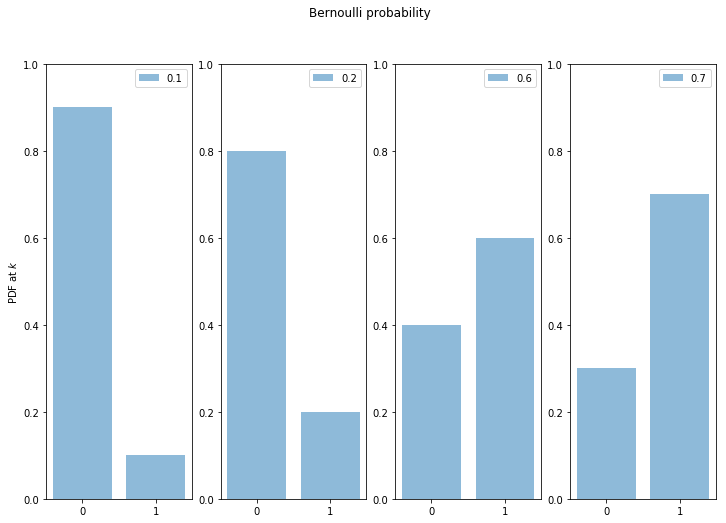

In [9]:
# the .pmf function returns the probability given a value of p 
a = np.arange(2)

#colors = matplotlib.rcParams['axes.color_cycle']
plt.figure(figsize=(12,8))
for i, p in enumerate([0.1, 0.2, 0.6, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, p), label=p, alpha=0.5) # removed color
    ax.xaxis.set_ticks(a)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
    

q=plt.suptitle("Bernoulli probability")

0.76
0.4270831300812525


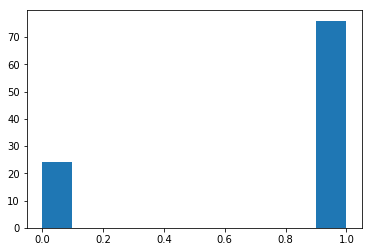

In [11]:
stgrades=bernoulli.rvs(0.75, size=100)
plt.hist(stgrades)
print (np.mean(stgrades))
print (np.std(stgrades))

In [ ]:
# Binomial distribution
# The expected value $E[X]=np$ and the variance is $Var[X]=np(1-p)$

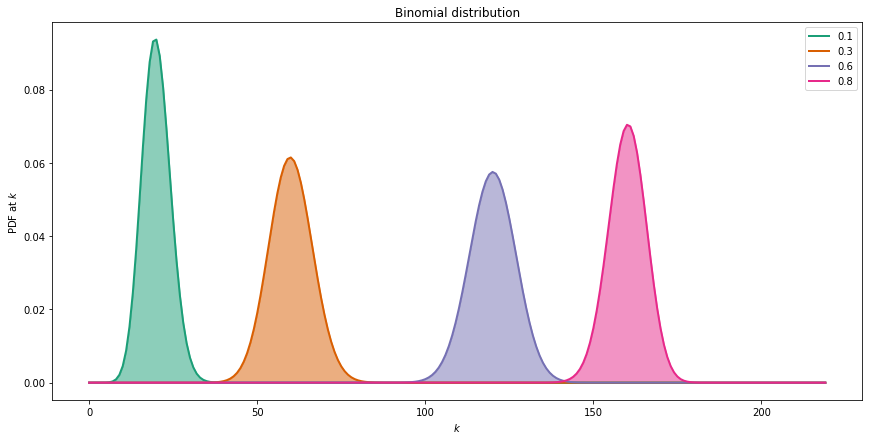

In [13]:
colors = dark2_colors
plt.figure(figsize=(12,6))
k = np.arange(0, 220)
for p, color in zip([0.1, 0.3, 0.6, 0.8], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

In [ ]:
# Example Binomial distribution
# Probability of 8 people getting a C or higher this year assuming we have 50 students in total. 
# In this case $p=0.75$ and $n=50$. If we assume uncorrelated events, then p(k=8; n=50, p=0.75)

(array([  2.,  10.,  50., 112., 219., 250., 200., 114.,  36.,   7.]),
 array([27. , 28.9, 30.8, 32.7, 34.6, 36.5, 38.4, 40.3, 42.2, 44.1, 46. ]),
 <a list of 10 Patch objects>)

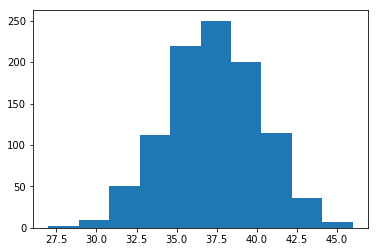

In [14]:
binom.pmf(8, 50, 0.75)
z=binom.rvs(50, 0.75, size=1000)
plt.hist(z)

In [ ]:
# Poisson distribution

Text(0,0.5,'PDF at k')

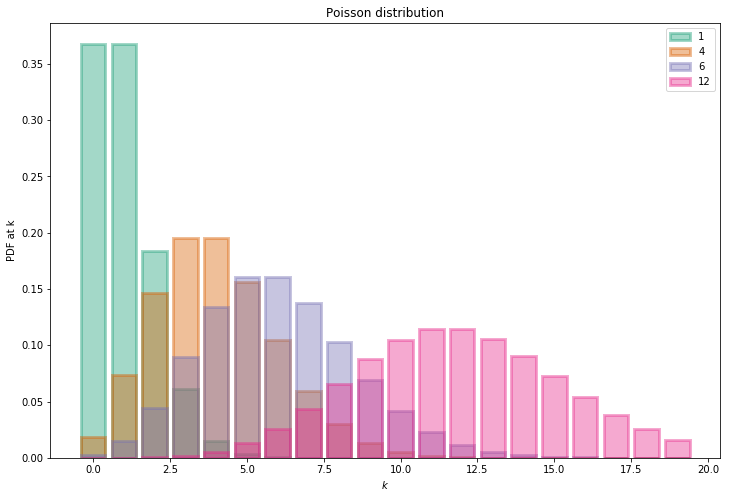

In [15]:
k = np.arange(20)
colors = colors = dark2_colors 
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 4, 6, 12]):
    plt.bar(k, poisson.pmf(k, lambda_), label=lambda_, color=colors[i], alpha=0.4, edgecolor=colors[i], lw=3)
    plt.legend()
plt.title("Poisson distribution")
plt.xlabel("$k$")
plt.ylabel("PDF at k")

Text(0.5,0,'$k$')

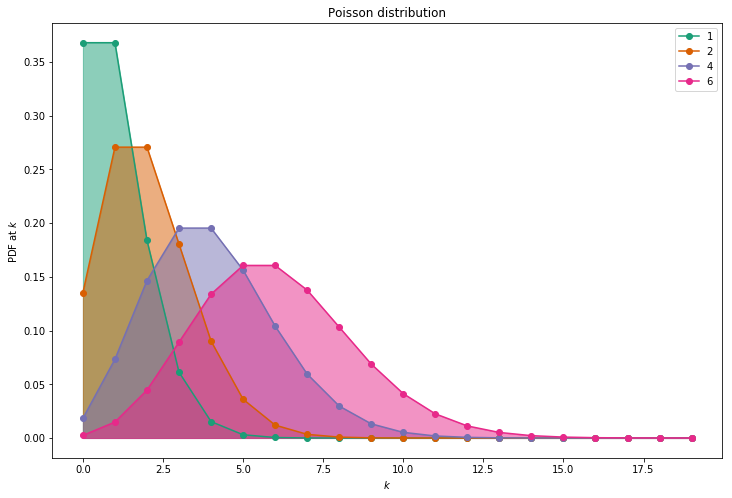

In [16]:
k = np.arange(20)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

In [17]:
# Continous variables
# Normal Distribution

Text(0.5,0,'$x$')

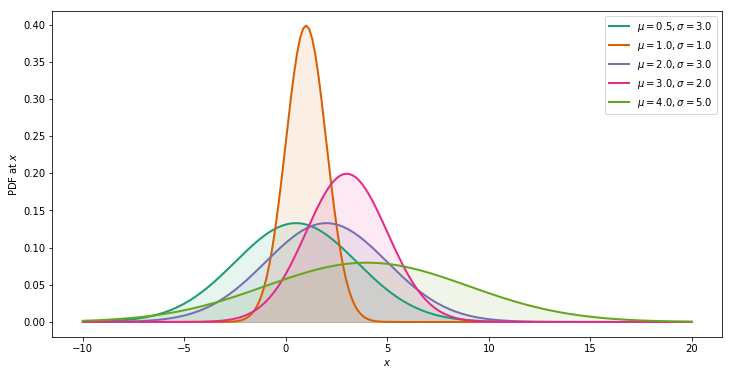

In [18]:
normal = scipy.stats.norm
x = np.linspace(-10,20, num=200)

colors = colors = dark2_colors
fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5, 1, 2, 3, 4], [3, 1, 3, 2, 5], colors):
    plt.plot(x, normal.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, normal.pdf(x, mu, sigma), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

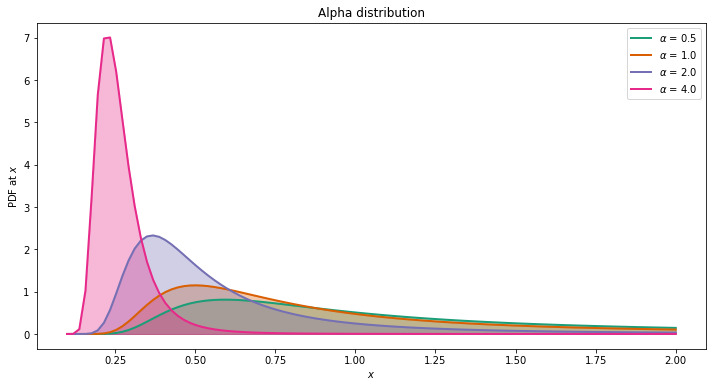

In [19]:
# Alpha
x = np.linspace(0.1, 2, 100)
alpha = scipy.stats.alpha
alphas = [0.5, 1, 2, 4]
plt.figure(figsize=(12,6))
for a,c in zip(alphas,colors):
    
    label=r"$\alpha$ = {0:.1f}".format(a)
    plt.plot(x, alpha.pdf(x, a), lw=2, 
              color=c, label=label)
    plt.fill_between(x, alpha.pdf(x, a), color=c, alpha = .33)
    

plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Alpha distribution")

q=plt.legend()

Text(0.5,0,'$x$')

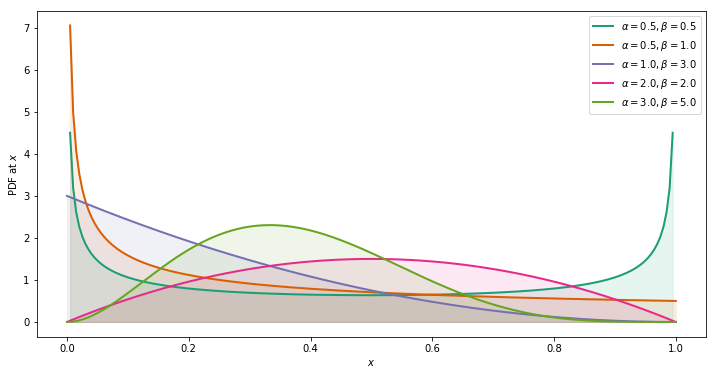

In [20]:
# Beta distribution
beta = scipy.stats.beta
x = np.linspace(0,1, num=200)
fig = plt.figure(figsize=(12,6))
for a, b, c in zip([0.5, 0.5, 1, 2, 3], [0.5, 1, 3, 2, 5], colors):
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             c=c, label = r"$\alpha = {0:.1f}, \beta={1:.1f}$".format(a, b))
    plt.fill_between(x, beta.pdf(x, a, b), color=c, alpha = .1)
      
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

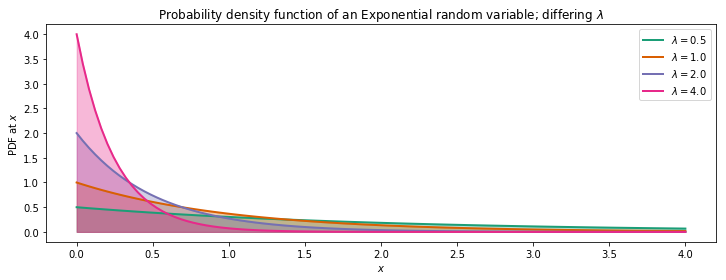

In [21]:
# Exponential
x = np.linspace(0,4, 100)
expo = scipy.stats.expon
lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_, colors):
    plt.plot(x, expo.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expo.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

In [22]:
# Mutlivariate random variates
# no data

In [23]:
# Regression

In [24]:
def linear_function(x,a,b):
    """ 
    A linear function
    
    Parameters
    ----------
    x : ndarray
        Input variable
    
    a : float
        offset parameter
    
    b : float 
        slope parameter
    """
    return a + b * x 

Text(0,0.5,'y')

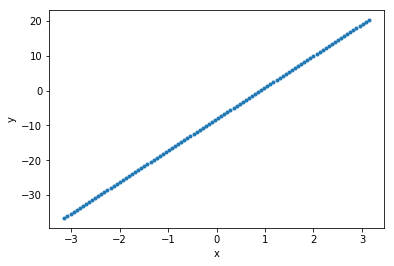

In [25]:
N = 100
x = np.linspace(-np.pi, np.pi, N)

a = np.random.randn() * 10
b = np.random.randn() * 10
y = linear_function(x, a, b)

fig, ax = plt.subplots(1)
ax.plot(x, y, '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0,0.5,'y')

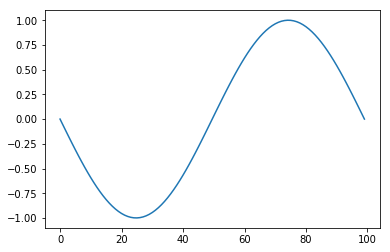

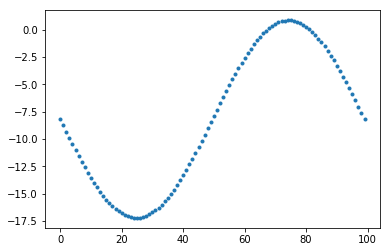

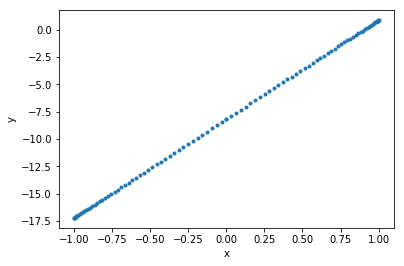

In [26]:
t = np.linspace(-np.pi, np.pi, N)
x = np.sin(t)

fig, ax = plt.subplots(1)
ax.plot(x)

y = linear_function(x, a, b)
fig, ax = plt.subplots(1)
ax.plot(y, '.')

fig, ax = plt.subplots(1)
ax.plot(x, y, '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [27]:
# Multi-linear regression:

In [28]:
p = 5  # Number of inputs

# Preallocate a matrix (make it a matrix of ones to account for beta_0):
X = np.ones((N, p)) 
for ii in range(1, p):
    X[:, ii] = np.sin((ii+1)*t)

In [29]:
def linear_model(X, beta):
    """ 
    The linear model

    Parameters
    ----------
    X : 2d array
        The design matrix : a matrix of regressors
    
    beta : 1d array 
        Model coefficients
    """ 
    return np.dot(X, beta)

(-3.141592653589793, 3.141592653589793)

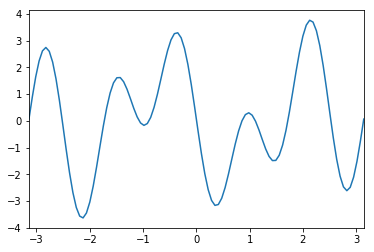

In [30]:
beta = np.random.randn(p)
f = linear_model(X, beta)
fig, ax = plt.subplots(1)
ax.plot(t, f)
ax.set_xlim([-np.pi, np.pi])

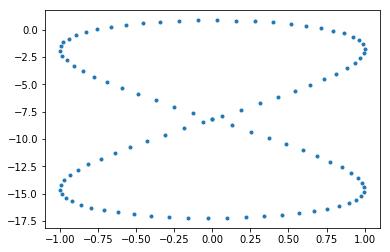

In [31]:
fig, ax = plt.subplots(1)
ax.plot(X[:, 1], y, '.')

In [ ]:
# noise

In [32]:
y = f + 0.1*np.random.randn(*f.shape)

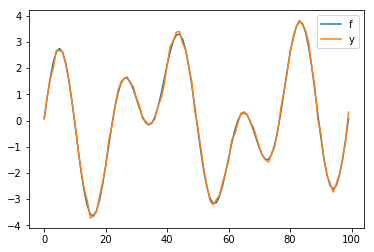

In [33]:
fig, ax = plt.subplots(1)
ax.plot(f, label='f')
ax.plot(y, label='y')
plt.legend()

In [34]:
# Solve the linear model
import scipy.linalg as la
def ols(X):
    """
    The matrix which solves the OLS regression problem for full-rank X
    """
    return np.dot(la.pinv(np.dot(X.T, X)), X.T)

In [35]:
beta_hat = np.dot(ols(X), y)

Text(0,0.5,'Estimate parameter value')

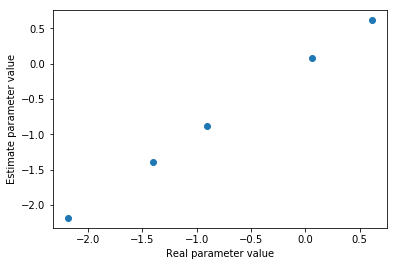

In [36]:
# estimated betas vs read betas

plt.plot(beta, beta_hat, 'o')
plt.xlabel('Real parameter value')
plt.ylabel('Estimate parameter value')

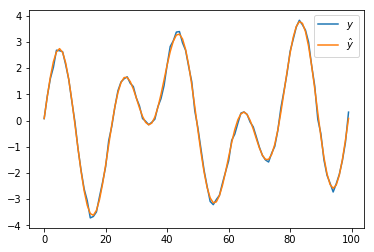

In [37]:
y_hat = np.dot(X, beta_hat)
fig, ax = plt.subplots(1)
ax.plot(y, label='$y$')
ax.plot(y_hat, label='$\hat{y}$')
plt.legend()

In [38]:
H = np.dot(X, ols(X))
H.shape
y_hat = np.dot(H.T, y)

Text(0,0.5,'Linear estimate of the output')

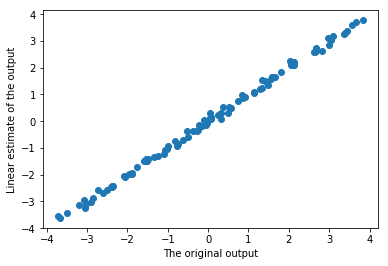

In [39]:
plt.plot(y, y_hat, 'o')
plt.xlabel('The original output') 
plt.ylabel('Linear estimate of the output')

In [40]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-1.html